## Data Source

- https://www.kaggle.com/datasets/luisblanche/covidct (Generalization-dataset1)
- https://www.kaggle.com/datasets/maedemaftouni/large-covid19-ct-slice-dataset (Generalization-dataset2)

- https://www.kaggle.com/datasets/mehradaria/covid19-lung-ct-scans (Training)
- https://www.kaggle.com/datasets/plameneduardo/sarscov2-ctscan-dataset (Training)

### Transfer Learning Links
- https://keras.io/guides/transfer_learning/
- https://keras.io/examples/vision/reptile/
- https://keras.io/guides/making_new_layers_and_models_via_subclassing/


In [1]:
import tensorflow as tf
#tf.config.list_physical_devices("GPU")
tf.config.set_visible_devices([], 'GPU')

2023-11-16 13:05:28.002738: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-16 13:05:28.032808: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-16 13:05:28.032830: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-16 13:05:28.032849: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-16 13:05:28.038536: I tensorflow/core/platform/cpu_feature_g

## Importing Relevant Libraries

In [2]:
import pandas as pd
import cv2
#from keras.utils.vis_utils import plot_model
import os.path
from PIL import Image
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
import os
import glob
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
#import keras_tuner as kt
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow import keras 
## Imports libs

## Renaming images data to Specified format

In [3]:
def renameImageFiles(folderpath, prefix,fileExtension):
    folder_path = folderpath
    new_prefix = prefix

    for i, file_path in enumerate(glob.glob(folder_path + '*.'+fileExtension)):
        new_file_name = new_prefix + '_' + str(i+1) + '.'+fileExtension
        os.rename(file_path, os.path.join(folder_path, new_file_name))


In [4]:
path1 = '/home/rkannan/Desktop/Cvd19_Classification/dataset_merged/CT_COVID/'
prefix1 = 'ct_covid'
path2 = '/home/rkannan/Desktop/Cvd19_Classification/dataset_merged/CT_NonCOVID/'
prefix2 = 'ct_noncovid'
# renameImageFiles(path1, prefix1,'png')
# renameImageFiles(path2, prefix2,'png')
# renameImageFiles(path2, prefix2,'jpg')

## Data Preprocessing
### Processing images for machine learning to create two-class dataset

In [5]:
def processImage(imgDirPath,binary_label):
    img_names = list()
    with os.scandir(imgDirPath) as dirs:
        for entry in dirs:
            img_names.append(entry.name)
    #Creating features for images
    all_features = []
    for img in img_names:
        path = imgDirPath + img
        cv_img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        cv_img2 = cv2.resize(cv_img, (300, 300), interpolation=cv2.INTER_NEAREST)
        #create features for machine learning
        nFeatures = (cv_img2.shape[0]*cv_img2.shape[1])
        features = np.reshape(cv_img2, nFeatures)
        all_features.append(features)
        #print(features.shape)
    imgs_df = pd.DataFrame(np.array(all_features), index=img_names)
    if binary_label == 0:
        imgs_df['class_label'] = np.zeros((imgs_df.shape[0]),dtype=int)
    else:
        imgs_df['class_label'] = np.ones((imgs_df.shape[0]),dtype=int)
    return imgs_df   

#### Processing CT_scan Covid-19  CT_scan nonCovid-19 images

In [6]:
ct_covid_features_df =  processImage(path1,1)#1--> covid-19 positive
ct_noncovid_features_df =  processImage(path2,0)#0 ---> covnid-19 negative

In [7]:
ct_covid_features_df

,0,1,2,3,4,5,6,7,8,9,...,89991,89992,89993,89994,89995,89996,89997,89998,89999,class_label
Covid (1164).png,56,56,56,55,56,56,56,56,56,56,...,220,220,222,226,228,227,229,228,228,1
Covid (1048).png,206,206,207,205,207,211,207,207,207,206,...,255,255,254,254,253,253,253,253,254,1
COVID-19_0795.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Covid (900).png,204,203,209,203,207,189,204,199,212,214,...,209,213,211,202,200,206,197,202,206,1
Covid (200).png,209,226,216,207,208,201,197,192,192,202,...,206,205,207,207,207,198,255,255,255,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Covid (54).png,68,68,68,68,68,68,68,68,69,71,...,182,201,210,206,202,180,201,196,192,1
COVID-19_0196.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
COVID-19_0252.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Covid (464).png,202,202,204,206,205,204,205,205,204,204,...,233,234,234,234,234,234,234,234,234,1


In [9]:
ct_noncovid_features_df

,0,1,2,3,4,5,6,7,8,9,...,89991,89992,89993,89994,89995,89996,89997,89998,89999,class_label
Non-Covid (356).png,67,76,92,108,148,168,187,210,215,213,...,65,65,65,64,64,65,67,67,63,0
Non-Covid (170).png,218,218,233,235,234,228,215,219,223,228,...,244,234,237,249,245,220,201,199,211,0
Non-COVID-19_118.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Non-Covid (319).png,66,66,66,66,66,67,67,67,67,67,...,166,195,211,214,213,155,120,94,83,0
Non-Covid (1164).png,70,70,70,69,68,70,69,68,68,67,...,207,211,217,205,183,123,102,91,87,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Non-Covid (53).png,203,200,207,205,201,209,207,205,205,207,...,228,233,236,236,235,240,242,240,237,0
Non-Covid (243).png,66,66,65,65,70,73,67,63,67,68,...,202,204,205,206,207,207,206,206,206,0
Non-COVID-19_622.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Non-Covid (699).png,63,63,63,64,64,64,64,64,64,64,...,229,230,232,234,236,236,238,217,202,0


#### Concatenating the two data frame to create a dataset ready for machine learning

In [11]:
cvd_imgs = [ct_noncovid_features_df, ct_covid_features_df]
cvd_imgs_dataset = pd.concat(cvd_imgs)
for i in range(100):
    # shuffle the DataFrame rows
    cvd_imgs_dataset = cvd_imgs_dataset.sample(frac = 1)
display(cvd_imgs_dataset)

,0,1,2,3,4,5,6,7,8,9,...,89991,89992,89993,89994,89995,89996,89997,89998,89999,class_label
Non-COVID-19_552.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Non-Covid (895).png,62,59,69,68,63,68,58,61,53,75,...,231,225,229,229,228,228,228,228,229,0
Non-Covid (322).png,1,1,1,1,0,5,4,0,0,0,...,69,70,68,66,66,69,68,68,69,0
Non-Covid (1123).png,1,1,1,1,1,1,1,1,1,1,...,65,82,82,82,80,75,63,83,82,0
Non-Covid (708).png,249,254,255,254,252,253,254,255,255,255,...,249,255,249,248,255,227,160,127,99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Covid (877).png,200,216,203,204,210,208,214,219,212,202,...,200,196,193,193,193,191,190,199,203,1
Covid (723).png,200,202,200,196,199,207,210,206,206,204,...,202,201,200,202,205,205,205,206,205,1
Non-COVID-19_596.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Non-Covid (1165).png,210,204,202,207,198,199,199,199,201,200,...,81,81,81,81,81,81,78,79,80,0


In [12]:
input_data_x = cvd_imgs_dataset.iloc[:,:-1].to_numpy().reshape((4649,300,300,1))
#input_data_x = cvd_imgs_dataset.iloc[:,:-1].to_numpy()
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cvd_imgs_dataset['output_encode'] = label_encoder.fit_transform(cvd_imgs_dataset['class_label'])
cvd_imgs_dataset
cvd_imgs_dataset = pd.get_dummies(cvd_imgs_dataset, columns =['output_encode'])
##Getting the input_labels and input_features for training and testing model
output_label_y = np.array(cvd_imgs_dataset[['output_encode_0','output_encode_1']])
# print('Input_x Data: \n{0}'.format(input_data_x))
# print('Output_y Data: \n{0}'.format(output_label_y))
print('Input_x Data Shape: \n{0}'.format(input_data_x.shape))
print('Output_y Data Shape: \n{0}'.format(output_label_y.shape))

Input_x Data Shape: 
(4649, 300, 300, 1)
Output_y Data Shape: 
(4649, 2)


#### visualize first 5 images from the dataset

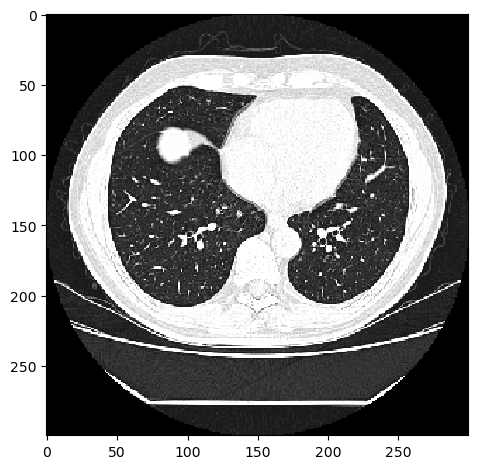

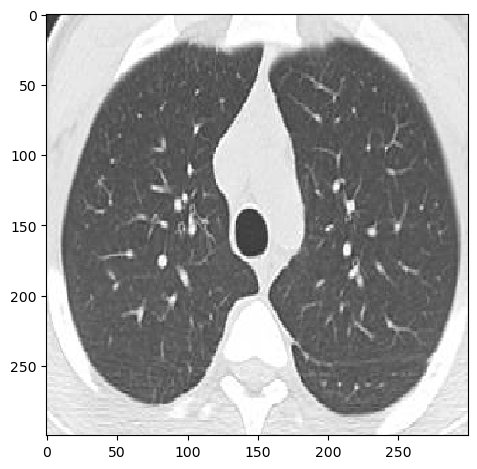

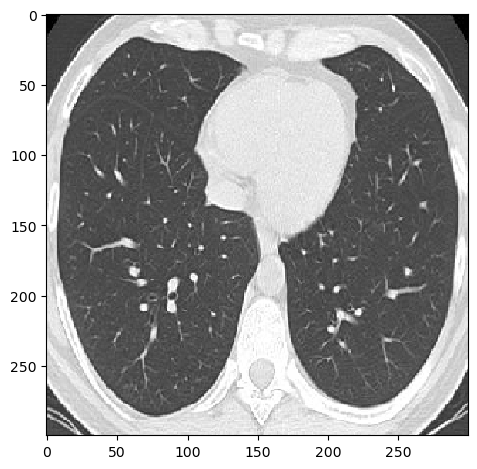

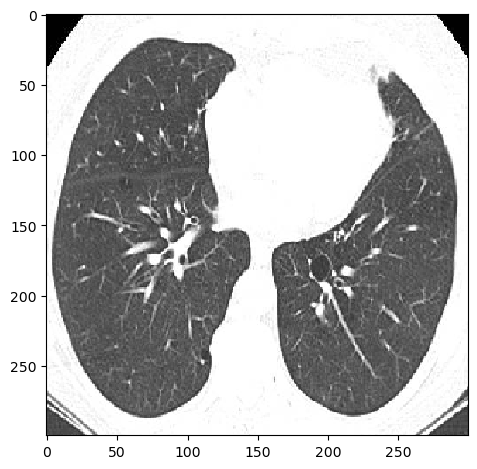

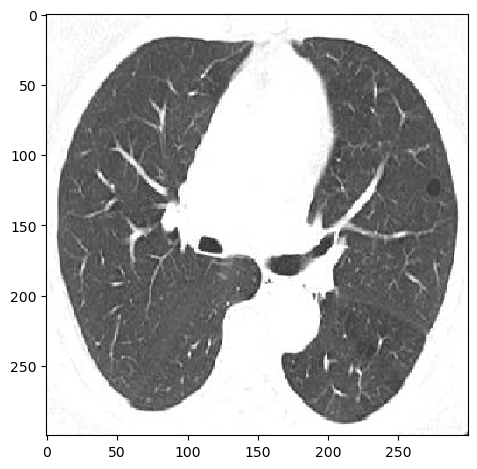

In [13]:
for i in range(5):
    imshow(input_data_x[i])
    show()

### Feature Scaling

#### **Splitting the dataset into the Training set and Test set**

In [14]:
from sklearn.model_selection import train_test_split

train_features_orgn, test_features_orgn, train_labels_orgn, test_labels_orgn = train_test_split(
    input_data_x, output_label_y, test_size=.20, random_state=42)

### Data Augmentation

In [15]:
image_size = 300
data_augmentation = keras.Sequential(
    [
        tf.keras.layers.Normalization(),
        tf.keras.layers.Resizing(image_size, image_size),
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(factor=0.02),
        tf.keras.layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(train_features_orgn)

### Building Model

In [16]:
def CNN_Mod(model, num_hl, hl_list,hl_conv_activation, ol_activation, dropout_val, inputShape,filters_,kernel_size_,stride_poolSize):
    '''
    CNN_Mod(model, num_hl, hl_list,hl_conv_activation, ol_activation, dropout_val, inputShape,filters_,kernel_size_,stride_poolSize):
        model = CNN Model
        num_hl = number of hidden layers
        hl_list = list of hidden layers
        hl_activation = hidden layer activation function
        out_activation = output layer activation function
        dropout_val = Dropout value
        inputShape = shape of input layer
        filters_ = filter size of Conv layer
        kernel_size_ = size of kernel (x,x)
        strides_poolSize = strides and max_pool_szie
    '''
    assert(num_hl == len(hl_list))
    assert(num_hl == len(dropout_val))
    inputs = tf.keras.layers.Input(shape=inputShape)
    # Augment data.
    augmented = data_augmentation(inputs)
    
    #connnnvolultion layer 1 with Map-pooling
    conv_layer_1 = tf.keras.layers.Conv2D(filters = filters_,kernel_size = kernel_size_,strides = stride_poolSize, activation = hl_conv_activation)(augmented)
    conv_layer_1_max_pool = tf.keras.layers.MaxPool2D(strides=stride_poolSize)(conv_layer_1)
    x1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(conv_layer_1_max_pool)
    
    #connnnvolultion layer 1 with Map-pooling
    conv_layer_2 = tf.keras.layers.Conv2D(filters = filters_,kernel_size = kernel_size_,strides = stride_poolSize, activation = hl_conv_activation)(x1)
    conv_layer_2_max_pool = tf.keras.layers.MaxPool2D(strides=stride_poolSize)(conv_layer_2)
    x2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(conv_layer_2_max_pool)
    
    flatten_layer = tf.keras.layers.Flatten()(x2)
    
    dense_layers = tf.keras.layers.Dense(units = hl_list[0], activation = hl_conv_activation)(flatten_layer)
    dense_layers = tf.keras.layers.Dropout(dropout_val[0])(dense_layers)
    
    dense_layers = tf.keras.layers.Dense(units = hl_list[1], activation = hl_conv_activation)(dense_layers)
    dense_layers = tf.keras.layers.Dropout(dropout_val[1])(dense_layers)
    
    dense_layers = tf.keras.layers.Dense(units = hl_list[2], activation = hl_conv_activation)(dense_layers)
    dense_layers = tf.keras.layers.Dropout(dropout_val[2])(dense_layers)
    
    dense_layers = tf.keras.layers.Dense(units = hl_list[3], activation = hl_conv_activation)(dense_layers)
    dense_layers = tf.keras.layers.Dropout(dropout_val[3])(dense_layers)
    
    logits = tf.keras.layers.Dense(units = 2, activation = ol_activation)(dense_layers)
    
    # Create the Keras model.
    model = tf.keras.Model(inputs=inputs,outputs=logits)
    
    return model


def compile_model(model, loss_, learningRate, metrics_):
    '''
    def compile_model(DNN, loss_, learningRate, metrics_):
    DNN: the model
    loss_: the loss function
    learningRate: learning rate
    metrics_: metrics of interest [mse', 'mae'] #since a regression model
    '''
    model.compile(tf.keras.optimizers.Adam(learning_rate=learningRate,weight_decay=0.001),loss=loss_,metrics=metrics_)
    return model

def buildModel(model, val_split_size, batch_size_,numEpochs, patience_, monitor_, mode):
  '''
  def buildModel(DNN, val_split_size, batch_size_,numEpochs, patience_, monitor_, mode):
    DNN: DNN which the model
    val_split_size: the validation split)
    batch_size_: batch_size
    numEpochs: number of epochs
    patience_: patience of call back
    monitor_: monitor (objective of callback)
    mode: mode (min, max, auto)
  '''
  history = model.fit(
    train_features_orgn, 
    train_labels_orgn,
    validation_split = val_split_size,
    batch_size = batch_size_, 
    epochs = numEpochs,
    callbacks = [
      tf.keras.callbacks.EarlyStopping(monitor= monitor_,patience=patience_,verbose=1,mode=mode),#monitoring loss mode should be min [---val_acc--]
    ]
    )
  
  return history

def evaluateModel_loss(history):
    print()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['Training loss','Validation loss'], loc = 'upper left')
    plt.savefig("Training_validation_loss_with_i.jpg")
    plt.show()
    plt.close()
    #plt.show()
    print()
def evaluateModel_accuracy(history):
    print()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Training and Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epochs')
    plt.legend(['Training Accuracy','Validation Accuracy'], loc = 'upper left')
    #plt.show()
    plt.savefig("Training_validation_accuracy_with_i.jpg")
    plt.show()
    plt.close()
    print()

print(CNN_Mod.__doc__)


    CNN_Mod(model, num_hl, hl_list,hl_conv_activation, ol_activation, dropout_val, inputShape,filters_,kernel_size_,stride_poolSize):
        model = CNN Model
        num_hl = number of hidden layers
        hl_list = list of hidden layers
        hl_activation = hidden layer activation function
        out_activation = output layer activation function
        dropout_val = Dropout value
        inputShape = shape of input layer
        filters_ = filter size of Conv layer
        kernel_size_ = size of kernel (x,x)
        strides_poolSize = strides and max_pool_szie
    


In [18]:
'''
Hyperparameters:
Hyperparameters:
Convolution Layers filter Count: : 100
Convolution Layers Kernel Size: : 5
Max-pooling_Stride_ Size: : 2
Hiddel Layer 1 Units: 2884
dropout1: False
Hiddel Layer 2 Units: 1288
dropout2: True
Hiddel Layer 3 Units: 332
dropout3: False
Hiddel Layer 4 Units: 116
dropout4: False
lr: 0.0015272304174499124
Score: 0.9326164722442627
'''

'''
Hyperparameters:
Convolution Layers filter Count: : 116
Convolution Layers Kernel Size: : 8
Max-pooling_Stride_ Size: : 2
Hiddel Layer 1 Units: 362
dropout1: False
Hiddel Layer 2 Units: 184
dropout2: True
Hiddel Layer 3 Units: 78
dropout3: True
Hiddel Layer 4 Units: 12
dropout4: True
lr: 0.0010621475226496656
Score: 0.9516128897666931
'''

'\nHyperparameters:\nConvolution Layers filter Count: : 116\nConvolution Layers Kernel Size: : 8\nMax-pooling_Stride_ Size: : 2\nHiddel Layer 1 Units: 362\ndropout1: False\nHiddel Layer 2 Units: 184\ndropout2: True\nHiddel Layer 3 Units: 78\ndropout3: True\nHiddel Layer 4 Units: 12\ndropout4: True\nlr: 0.0010621475226496656\nScore: 0.9516128897666931\n'

In [19]:
cnn_1  = tf.keras.models.Sequential()
cnn_1  = CNN_Mod(cnn_1, 4, [362, 184, 78, 12],'relu','softmax',[0.00,0.35,0.00,0.00],(300,300,1),116,8,2)
#compile and run model here
cnn_1  = compile_model(cnn_1,'categorical_crossentropy',0.0010621475226496656,['accuracy'])

In [22]:
cnn_1 = tf.keras.models.load_model('cvd_cnn_95_perc.h5')

In [72]:
cnn_1  = tf.keras.models.Sequential()
cnn_1  = CNN_Mod(cnn_1, 4, [362, 184, 78, 12],'relu','softmax',[0.00,0.35,0.00,0.00],(300,300,1),116,8,2)
#compile and run model here
cnn_1  = compile_model(cnn_1,'categorical_crossentropy',0.0010621475226496656,['accuracy'])
history = buildModel(cnn_1,0.20,128,100,10, "val_loss", "min")

Epoch 1/100
24/24 [==============================] - 36s 1s/step - loss: 0.7692 - accuracy: 0.6185 - val_loss: 0.5711 - val_accuracy: 0.7030
Epoch 2/100
24/24 [==============================] - 31s 1s/step - loss: 0.5860 - accuracy: 0.6854 - val_loss: 0.5438 - val_accuracy: 0.7366
Epoch 3/100
24/24 [==============================] - 30s 1s/step - loss: 0.5520 - accuracy: 0.7173 - val_loss: 0.5217 - val_accuracy: 0.7285
Epoch 4/100
24/24 [==============================] - 30s 1s/step - loss: 0.5330 - accuracy: 0.7348 - val_loss: 0.4696 - val_accuracy: 0.7863
Epoch 5/100
24/24 [==============================] - 31s 1s/step - loss: 0.4820 - accuracy: 0.7550 - val_loss: 0.4757 - val_accuracy: 0.7876
Epoch 6/100
24/24 [==============================] - 31s 1s/step - loss: 0.4861 - accuracy: 0.7597 - val_loss: 0.4365 - val_accuracy: 0.7930
Epoch 7/100
24/24 [==============================] - 31s 1s/step - loss: 0.4464 - accuracy: 0.7852 - val_loss: 0.4319 - val_accuracy: 0.7944
Epoch 8/100
2

24/24 [==============================] - 31s 1s/step - loss: 0.1914 - accuracy: 0.9247 - val_loss: 0.2513 - val_accuracy: 0.9073
Epoch 24/100
24/24 [==============================] - 31s 1s/step - loss: 0.2392 - accuracy: 0.8998 - val_loss: 0.2901 - val_accuracy: 0.8831
Epoch 25/100
24/24 [==============================] - 31s 1s/step - loss: 0.2157 - accuracy: 0.9059 - val_loss: 0.2462 - val_accuracy: 0.9032
Epoch 26/100
24/24 [==============================] - 31s 1s/step - loss: 0.1756 - accuracy: 0.9311 - val_loss: 0.2651 - val_accuracy: 0.9099
Epoch 27/100
24/24 [==============================] - 31s 1s/step - loss: 0.1568 - accuracy: 0.9398 - val_loss: 0.2120 - val_accuracy: 0.9288
Epoch 28/100
24/24 [==============================] - 31s 1s/step - loss: 0.1437 - accuracy: 0.9503 - val_loss: 0.1987 - val_accuracy: 0.9409
Epoch 29/100
24/24 [==============================] - 31s 1s/step - loss: 0.1888 - accuracy: 0.9264 - val_loss: 0.2434 - val_accuracy: 0.9126
Epoch 30/100
24/24 

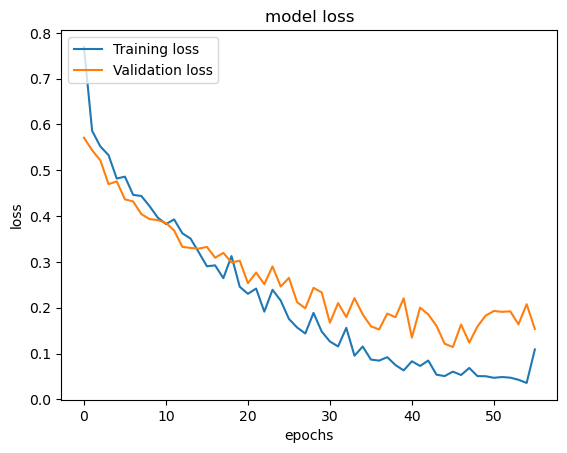

In [73]:
evaluateModel_loss(history)

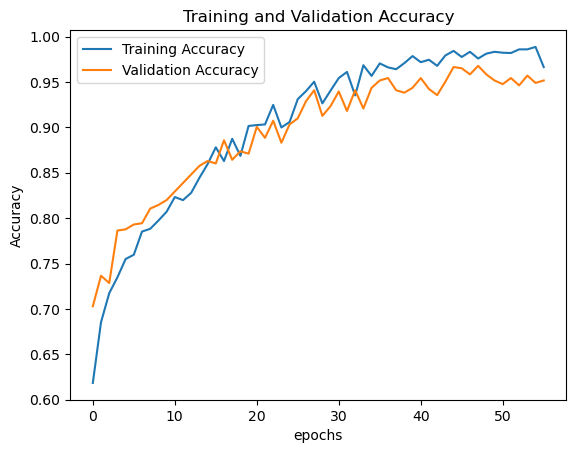

In [74]:
evaluateModel_accuracy(history)

In [77]:
cnn_1.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 300, 300, 1)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 200, 200, 1)      3         
 al)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 97, 97, 116)       7540      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 48, 48, 116)      0         
 2D)                                                             
                                                                 
 layer_normalization_8 (Laye  (None, 48, 48, 116)      232       
 rNormalization)                                                 
                                                          

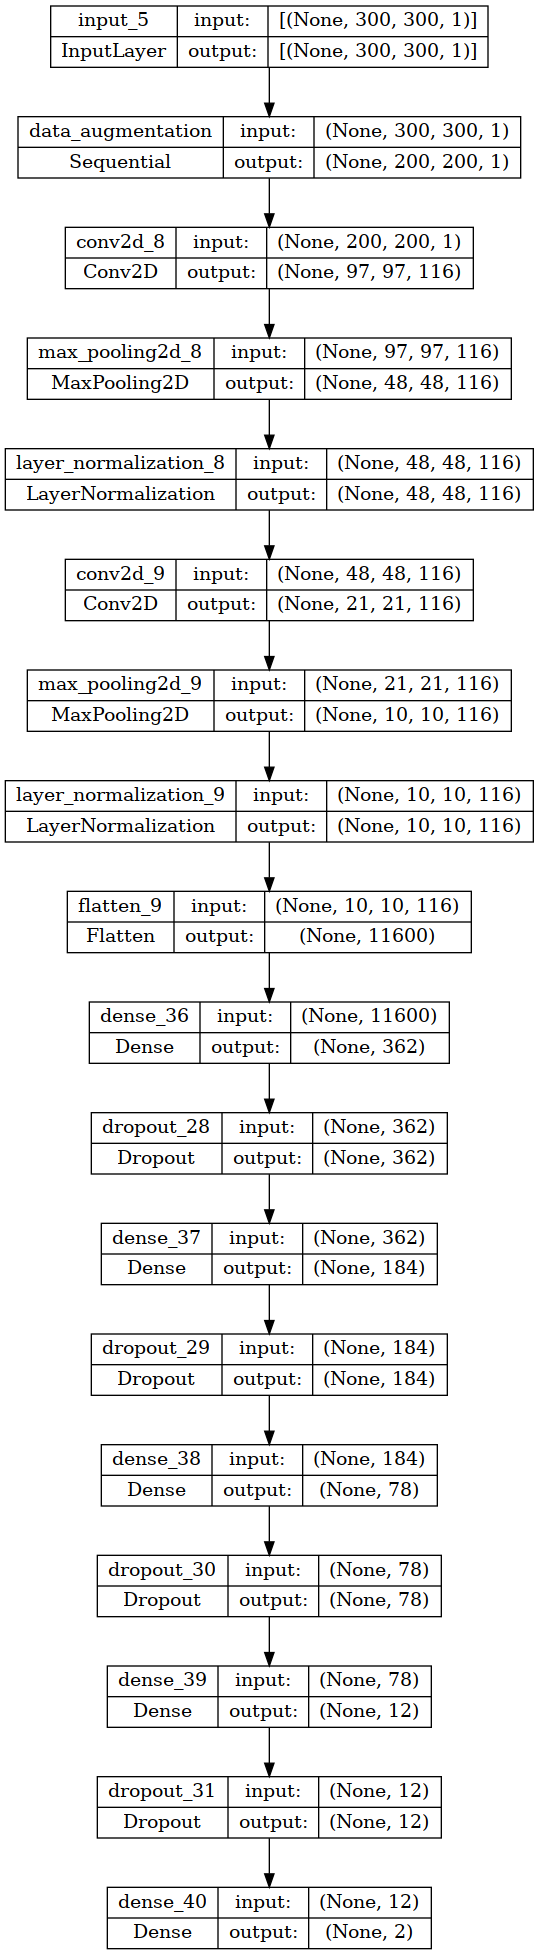

In [78]:
from keras.utils.vis_utils import plot_model
plot_model(cnn_1, to_file='cnn_1_plot.png', show_shapes=True, show_layer_names=True)

In [85]:
cnn_1.save('cvd_cnn_95_perc.h5')
cnn_1.save_weights('cvd_cnn_weight_95_perc.h5')

#### Testing Model

In [22]:
label_predicted = cnn_1.predict((test_features_orgn))

2023-07-24 11:09:17.576246: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100


30/30 [==============================] - 5s 14ms/step


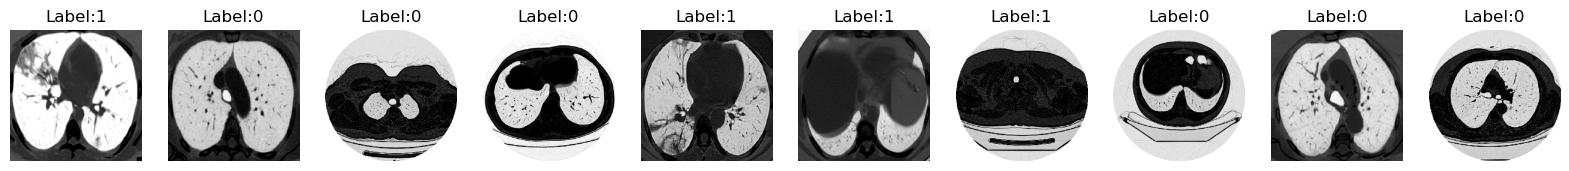

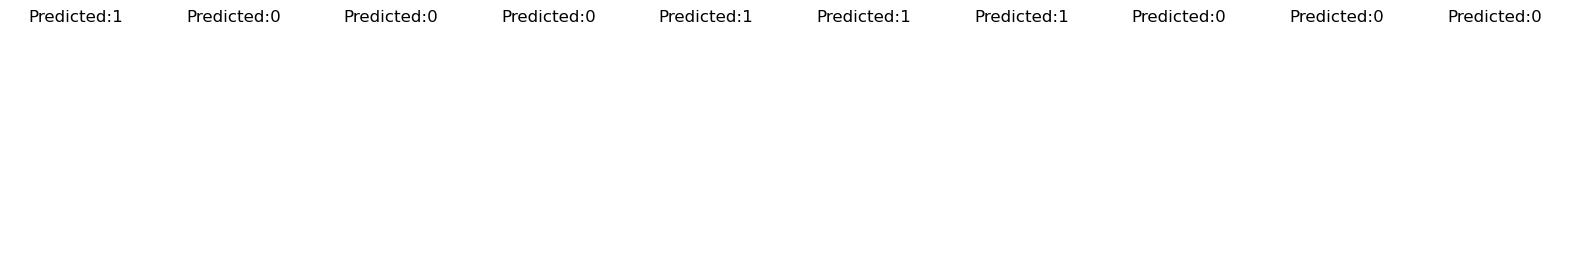

In [24]:
n_samples = 10

plt.figure(figsize=(n_samples * 2, 3))
for index in range(n_samples):
    plt.subplot(1, n_samples, index + 1)
    sample_image = test_features_orgn[index].reshape(300, 300)
    plt.imshow(sample_image, cmap="binary")
    plt.title("Label:" + str(test_labels_orgn[index].argmax()))
    plt.axis("off")

plt.show()

plt.figure(figsize=(n_samples * 2, 3))
for index in range(n_samples):
    plt.subplot(1, n_samples, index + 1)
    #sample_image = image_predicted[index].reshape(300, 300)
    #plt.imshow(sample_image, cmap="binary")
    plt.title("Predicted:" + str(np.argmax(label_predicted[index])))
    plt.axis("off")

plt.show()

In [17]:
def getCorrectLabel(x):
        if x == 0:
            return 'Non-Covid'
        if x == 1:
            return 'Covid'
        
def D1_to_D2(y_pred):
    y_true = {'y_true':[i[0] for i in y_pred]}
    y_true_df = pd.DataFrame(y_true)
    y_true_df = pd.get_dummies(y_true_df, columns =['y_true'])
    output_label_y = np.array(y_true_df[y_true_df.columns])
    return output_label_y

def getModelEvaluation(model, test_features_,test_labels_):
    predicted_labels = model.predict(np.stack(test_features_))
    df = pd.DataFrame(predicted_labels)
    df['Predicted_Labels'] = np.array(df.iloc[:,:2]).argmax(axis =1)
    df['Predicted_Labels'] = df['Predicted_Labels'].apply(getCorrectLabel)
    if (test_labels_.shape[1]==2):
        df['Actual_Labels'] = test_labels_[:,:2].argmax(axis = 1)
    else:
        df['Actual_Labels'] = D1_to_D2(test_labels_)[:,:2].argmax(axis = 1)
    df['Actual_Labels'] = df['Actual_Labels'].apply(getCorrectLabel)
    cm = pd.crosstab(df.Predicted_Labels, df.Actual_Labels)
    fig = plt.figure(figsize=(20,5))
    ax1 = plt.subplot(121)
    sns.heatmap(cm,annot = True,cmap='Blues')
    ax1.set_title('')
    # Saving the figure.
    plt.savefig("test_Confusion_Matrix_with_i.jpg")
    plt.show()
    plt.close()

    pred = model.evaluate(test_features_,test_labels_)
    print("loss = " + str(pred[0]))
    print("test accuracy = " + str(pred[1]))

In [18]:
def getCorrectLabel(x):
        if x == 0:
            return 'Non-Covid'
        if x == 1:
            return 'Covid'
        
def D1_to_D2(y_pred):
    y_true = {'y_true':[i[0] for i in y_pred]}
    y_true_df = pd.DataFrame(y_true)
    y_true_df = pd.get_dummies(y_true_df, columns =['y_true'])
    output_label_y = np.array(y_true_df[y_true_df.columns])
    return output_label_y

def getModelEvaluation(model, test_features_,test_labels_):
    predicted_labels = model.predict(np.stack(test_features_))
    df = pd.DataFrame(predicted_labels)
    df['Predicted_Labels'] = np.array(df.iloc[:,:2]).argmax(axis =1)
    df['Predicted_Labels'] = df['Predicted_Labels'].apply(getCorrectLabel)
    if (test_labels_.shape[1]==2):
        df['Actual_Labels'] = test_labels_[:,:2].argmax(axis = 1)
    else:
        df['Actual_Labels'] = D1_to_D2(test_labels_)[:,:2].argmax(axis = 1)
    df['Actual_Labels'] = df['Actual_Labels'].apply(getCorrectLabel)
    cm = pd.crosstab(df.Predicted_Labels, df.Actual_Labels)
    fig = plt.figure(figsize=(20,5))
    ax1 = plt.subplot(121)
    sns.heatmap(cm,annot = True,cmap='Blues')
    ax1.set_title('')
    # Saving the figure.
    plt.savefig("test_Confusion_Matrix_with_i.jpg")
    plt.show()
    plt.close()
    
    test_labels__ = [i.argmax() for i in test_labels_]
    pred_list = [i.argmax() for i in predicted_labels]
    count = 0
    for i in range(test_labels_.shape[0]):
        if int(test_labels__[i]) == int(pred_list[i]):
            count+=1
    print("test accuracy = " + str((count/test_labels_.shape[0])*100)+'%')
    print('-------------------------------------------------------------------------------------------------')
    print('Model Metrics')
    # getting model predictions
    #test_predictions,_ = model.predict((x_test,y_test),20)
    predictions = pd.DataFrame(predicted_labels)#, columns=labels_ohe_names.columns
    predictions = list(predictions.idxmax(axis=1))
    test_labels__ = [i.argmax() for i in test_labels_]

    # evaluate model performance
    import model_evaluation_utils_ as meu
    meu.get_metrics(true_labels=test_labels__, 
                    predicted_labels=predictions)
    

30/30 [==============================] - 2s 71ms/step


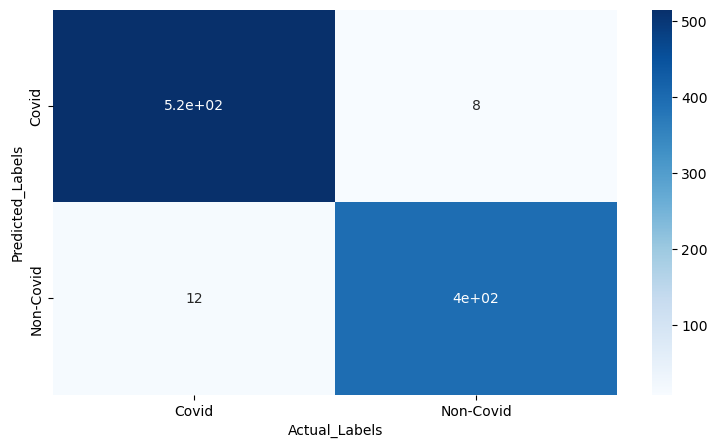

test accuracy = 97.84946236559139%
-------------------------------------------------------------------------------------------------
Model Metrics
Accuracy: 0.9785
Precision: 0.9786
Recall: 0.9785
F1 Score: 0.9785


In [23]:
import seaborn as sns
getModelEvaluation(cnn_1,test_features_orgn,test_labels_orgn)

### Testing the Trained Model on a different Dataset
- https://www.kaggle.com/datasets/maedemaftouni/large-covid19-ct-slice-dataset

In [19]:
def renameImageFiles(folderpath, prefix,fileExtension):
    folder_path = folderpath
    new_prefix = prefix

    for i, file_path in enumerate(glob.glob(folder_path + '*.'+fileExtension)):
        new_file_name = new_prefix + '_' + str(i+1) + '.'+fileExtension
        os.rename(file_path, os.path.join(folder_path, new_file_name))

path1 = '/home/rkannan/Desktop/Cvd19_Classification/dataset/dataset2/CT_COVID/'
prefix1 = 'ct_covid'
path2 = '/home/rkannan/Desktop/Cvd19_Classification/dataset/dataset2/CT_NonCOVID/'
prefix2 = 'ct_noncovid'

def processImage(imgDirPath,binary_label):
    img_names = list()
    with os.scandir(imgDirPath) as dirs:
        for entry in dirs:
            img_names.append(entry.name)
    #Creating features for images
    all_features = []
    for img in img_names:
        path = imgDirPath + img
        cv_img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        cv_img2 = cv2.resize(cv_img, (300, 300), interpolation=cv2.INTER_NEAREST)
        #create features for machine learning
        nFeatures = (cv_img2.shape[0]*cv_img2.shape[1])
        features = np.reshape(cv_img2, nFeatures)
        all_features.append(features)
        #print(features.shape)
    imgs_df = pd.DataFrame(np.array(all_features), index=img_names)
    if binary_label == 0:
        imgs_df['class_label'] = np.zeros((imgs_df.shape[0]),dtype=int)
    else:
        imgs_df['class_label'] = np.ones((imgs_df.shape[0]),dtype=int)
    return imgs_df


ct_covid_features_df =  processImage(path1,1)#1--> covid-19 positive
ct_noncovid_features_df =  processImage(path2,0)#0 ---> covnid-19 negative
cvd_imgs = [ct_noncovid_features_df, ct_covid_features_df]
cvd_imgs_dataset = pd.concat(cvd_imgs)
for i in range(100):
    # shuffle the DataFrame rows
    cvd_imgs_dataset = cvd_imgs_dataset.sample(frac = 1)
display(cvd_imgs_dataset)

input_data_x = cvd_imgs_dataset.iloc[:,:-1].to_numpy().reshape((14486,300,300,1))#dataset1=746
#input_data_x = cvd_imgs_dataset.iloc[:,:-1].to_numpy()
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cvd_imgs_dataset['output_encode'] = label_encoder.fit_transform(cvd_imgs_dataset['class_label'])
cvd_imgs_dataset
cvd_imgs_dataset_ = pd.get_dummies(cvd_imgs_dataset, columns =['output_encode'])
##Getting the input_labels and input_features for training and testing model
output_label_y = np.array(cvd_imgs_dataset_[['output_encode_0','output_encode_1']])
#output_label_y = np.array(cvd_imgs_dataset[['output_encode']])
# print('Input_x Data: \n{0}'.format(input_data_x))
# print('Output_y Data: \n{0}'.format(output_label_y))
print('Input_x Data Shape: \n{0}'.format(input_data_x.shape))
print('Output_y Data Shape: \n{0}'.format(output_label_y.shape))
#print('Output_y Data Shape for evaluation: \n{0}'.format(output_label_y_eval.shape))

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


,0,1,2,3,4,5,6,7,8,9,...,89991,89992,89993,89994,89995,89996,89997,89998,89999,class_label
ct_covid_1215.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ct_noncovid_2189.png,0,0,0,0,0,0,0,0,7,0,...,0,0,0,0,0,0,0,0,0,0
ct_covid_3269.png,16,24,18,19,23,24,22,20,23,24,...,28,29,34,34,37,34,39,40,42,1
ct_covid_3131.png,0,0,3,0,0,6,2,3,0,8,...,1,1,5,0,1,2,0,6,0,1
ct_noncovid_827.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ct_covid_3124.png,2,1,5,2,1,2,2,3,2,3,...,0,0,0,0,0,0,0,0,0,1
ct_covid_4891.png,12,9,0,3,0,0,6,4,3,3,...,7,0,0,0,0,4,3,7,4,1
ct_noncovid_6132.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ct_covid_4882.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Input_x Data Shape: 
(14486, 300, 300, 1)
Output_y Data Shape: 
(14486, 2)


In [20]:
y_test_new = output_label_y
x_test_new = input_data_x

In [21]:
from sklearn.model_selection import train_test_split

train_features_gen_2, test_features_gen_2, train_labels_gen_2, test_labels_gen_2 = train_test_split(
    input_data_x, output_label_y, test_size=.20, random_state=42)

train_features_gen_2, val_features_gen_2, train_labels_gen_2, val_labels_gen_2 = train_test_split(
    train_features_gen_2, train_labels_gen_2, test_size=.20, random_state=42)

### Loading Trained Model on old dataset

In [20]:
cnn_old  = tf.keras.models.Sequential()
cnn_old  = CNN_Mod(cnn_old, 4, [362, 184, 78, 12],'relu','softmax',[0.00,0.35,0.00,0.00],(300,300,1),116,8,2)
#compile and run model here
cnn_old  = compile_model(cnn_old,'categorical_crossentropy',0.0010621475226496656,['accuracy'])
cnn_old.load_weights('cvd_cnn_weight_95_perc.h5')

91/91 [==============================] - 1s 12ms/step


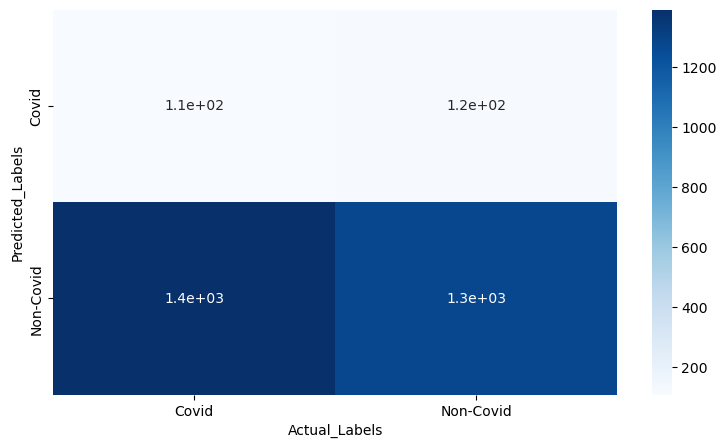

test accuracy = 47.96411318150449%
-------------------------------------------------------------------------------------------------
Model Metrics
Accuracy: 0.4796
Precision: 0.483
Recall: 0.4796
F1 Score: 0.3687


In [25]:
import seaborn as sns
getModelEvaluation(cnn_old,test_features_gen_2,test_labels_gen_2)

### Generalizing the Model on new Dataset 1 using Transfer Learning (Pretrained Weights from Task 1 model)

In [26]:
def CNN_Mod_generalize(model, num_hl, hl_list,hl_conv_activation, ol_activation, dropout_val, inputShape,filters_,kernel_size_,stride_poolSize):
    # Load the pre-trained model without the top (fully connected) layers
    model_ = tf.keras.models.load_model('/home/rkannan/Desktop/Cvd19_Classification/CNN Model-July/cvd_cnn_95_perc.h5')
    
    # Step 2: Identify the layers to keep (e.g., excluding the last fully connected layer)
    layers_to_keep = model_.layers[:-10]
    
    #getting the input and output tensor from old model to create new model_without fully connected layers
    input_tensor = model_.input
#     #     # Augment data.
#     input_tensor = data_augmentation(input_tensor)
    output_tensor = layers_to_keep[-1].output
    new_model = tf.keras.Model(inputs=input_tensor, outputs=output_tensor)
    #from keras.utils.vis_utils import plot_model
    # Freeze the pre-trained layers
    for layer in new_model.layers:
        layer.trainable = False
    
    start_new = new_model.output
    # Add new classifier layers
    flatten_layer = tf.keras.layers.Flatten()(start_new)

    assert(num_hl == len(hl_list))
    assert(num_hl == len(dropout_val))
    

    
    dense_layers = tf.keras.layers.Dense(units = hl_list[0], activation = hl_conv_activation)(flatten_layer)
    dense_layers = tf.keras.layers.Dropout(dropout_val[0])(dense_layers)
    
    
    logits = tf.keras.layers.Dense(units = 2, activation = ol_activation)(dense_layers)
    
    # Create the Keras model.
    model = tf.keras.Model(inputs=input_tensor,outputs=logits)
    
    return model

In [27]:
def buildModel_generalize(model, val_split_size, batch_size_,numEpochs, patience_, monitor_, mode):
  '''
  def buildModel(DNN, val_split_size, batch_size_,numEpochs, patience_, monitor_, mode):
    DNN: DNN which the model
    val_split_size: the validation split)
    batch_size_: batch_size
    numEpochs: number of epochs
    patience_: patience of call back
    monitor_: monitor (objective of callback)
    mode: mode (min, max, auto)
  '''
  history = model.fit(
    train_features_gen_2, 
    train_labels_gen_2,
    #validation_split = val_split_size,
    validation_data=(val_features_gen_2, val_labels_gen_2),
    batch_size = batch_size_, 
    epochs = numEpochs,
    callbacks = [
      tf.keras.callbacks.EarlyStopping(monitor= monitor_,patience=patience_,verbose=1,mode=mode),#monitoring loss mode should be min [---val_acc--]
    ]
    )
  
  return history

In [28]:
def CNN_Mod_generalize(model, num_hl, hl_list,hl_conv_activation, ol_activation, dropout_val, inputShape,filters_,kernel_size_,stride_poolSize):
    # Load the pre-trained model without the top (fully connected) layers
    model_ = tf.keras.models.load_model('/home/rkannan/Desktop/Cvd19_Classification/CNN Model-July/cvd_cnn_95_perc.h5')
    
    # Step 2: Identify the layers to keep (e.g., excluding the last fully connected layer)
    layers_to_keep = model_.layers[:-10]
    
    #getting the input and output tensor from old model to create new model_without fully connected layers
    input_tensor = model_.input
#     #     # Augment data.
#     input_tensor = data_augmentation(input_tensor)
    output_tensor = layers_to_keep[-1].output
    new_model = tf.keras.Model(inputs=input_tensor, outputs=output_tensor)
    #from keras.utils.vis_utils import plot_model
    # Freeze the pre-trained layers
    for layer in new_model.layers:
        layer.trainable = False
    
    start_new = new_model.output
    # Add new classifier layers
    flatten_layer = tf.keras.layers.Flatten()(start_new)

    assert(num_hl == len(hl_list))
    assert(num_hl == len(dropout_val))
  
    dense_layers = tf.keras.layers.Dense(units = hl_list[0], activation = hl_conv_activation)(flatten_layer)
    dense_layers = tf.keras.layers.Dropout(dropout_val[0])(dense_layers)
    
    dense_layers = tf.keras.layers.Dense(units = hl_list[1], activation = hl_conv_activation)(dense_layers)
    dense_layers = tf.keras.layers.Dropout(dropout_val[1])(dense_layers)
    
    dense_layers = tf.keras.layers.Dense(units = hl_list[2], activation = hl_conv_activation)(dense_layers)
    dense_layers = tf.keras.layers.Dropout(dropout_val[2])(dense_layers)
    
    dense_layers = tf.keras.layers.Dense(units = hl_list[3], activation = hl_conv_activation)(dense_layers)
    dense_layers = tf.keras.layers.Dropout(dropout_val[3])(dense_layers)
    
    logits = tf.keras.layers.Dense(units = 2, activation = ol_activation)(dense_layers)
    
    # Create the Keras model.
    model = tf.keras.Model(inputs=input_tensor,outputs=logits)
    
    return model

In [29]:
cnn_2_gen  = tf.keras.models.Sequential()
cnn_2_gen  = CNN_Mod_generalize(cnn_2_gen,4, [362, 184, 78, 12],'relu','softmax',[0.50,0.50,0.50,0.05],(300,300,1),116,8,2)
#compile and run model here
cnn_2_gen  = compile_model(cnn_2_gen,'categorical_crossentropy',0.0010621475226496656,['accuracy'])
cnn_2_gen.load_weights('cvd_cnn_2_gen_weight_92_perc.h5')
history_ = buildModel_generalize(cnn_2_gen,0.20,256,100,10, "val_loss", "min")

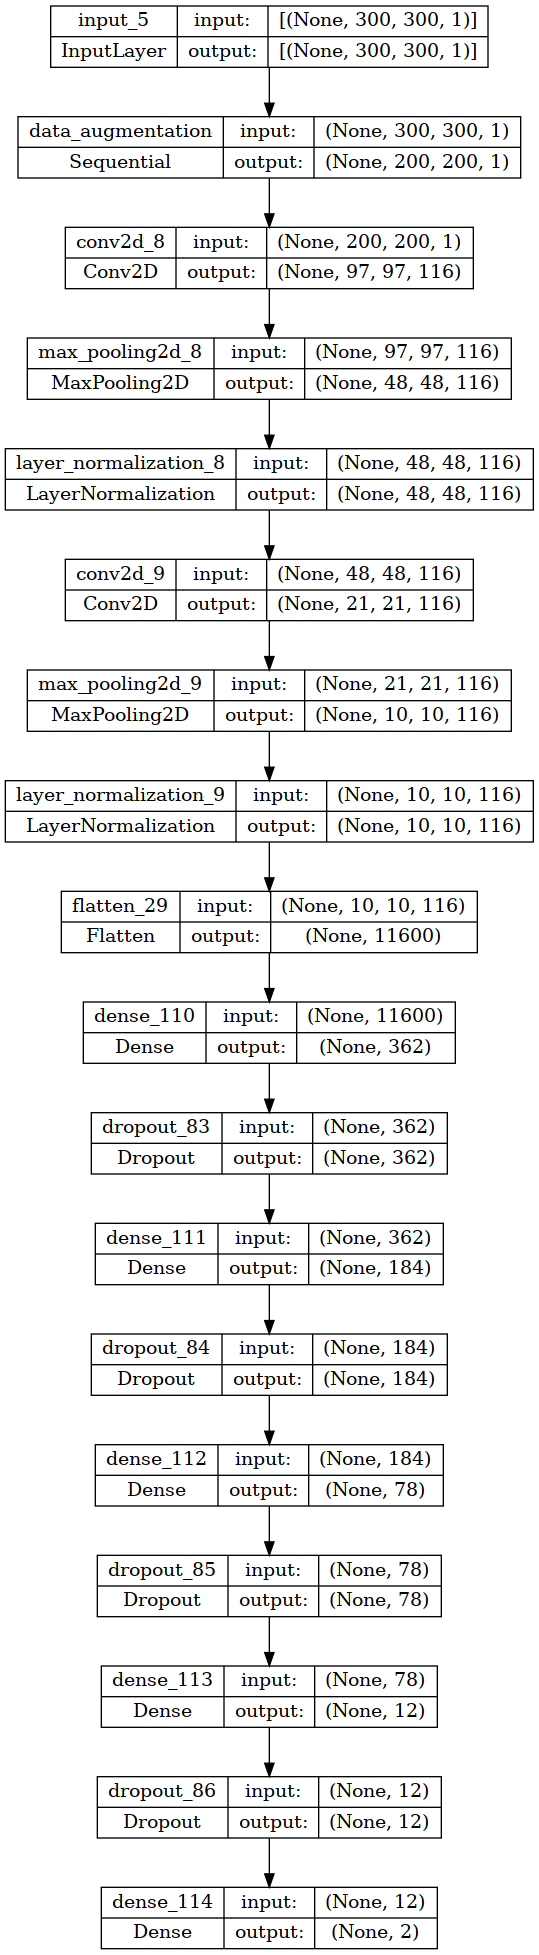

In [157]:
plot_model(cnn_2_gen, to_file='cnn_2_gen_plot.png', show_shapes=True, show_layer_names=True)

91/91 [==============================] - 1s 12ms/step


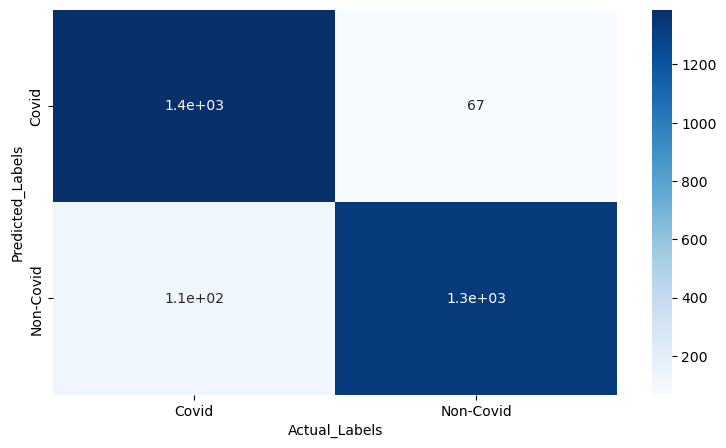

test accuracy = 93.75431331953071%
-------------------------------------------------------------------------------------------------
Model Metrics
Accuracy: 0.9375
Precision: 0.9381
Recall: 0.9375
F1 Score: 0.9376


In [30]:
getModelEvaluation(cnn_2_gen,test_features_gen_2,test_labels_gen_2)

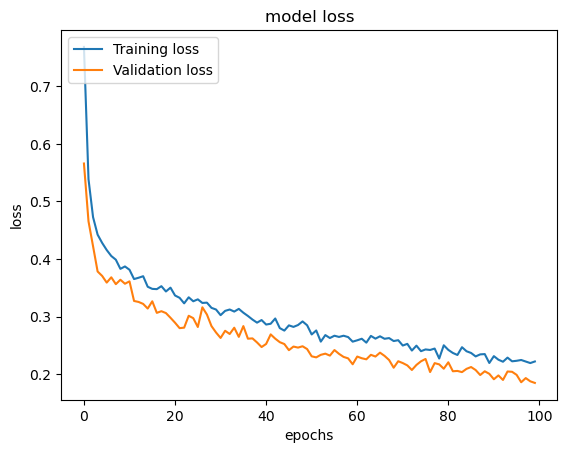

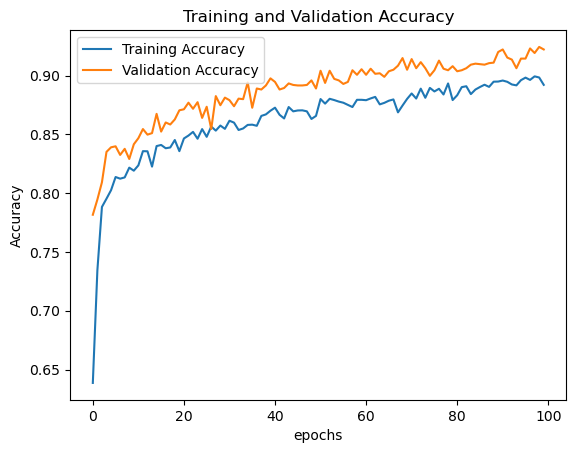

In [164]:
evaluateModel_loss(history_)
evaluateModel_accuracy(history_)

#### Testing Generalized Model via Transfer Learning on its original dataset

30/30 [==============================] - 0s 14ms/step


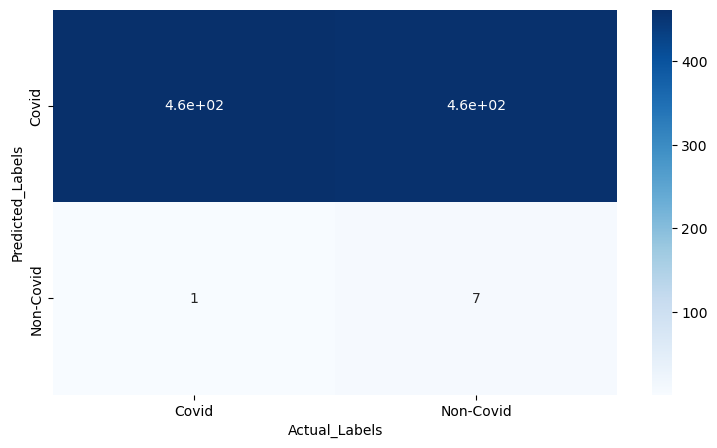

test accuracy = 50.43010752688172%
-------------------------------------------------------------------------------------------------
Model Metrics
Accuracy: 0.5043
Precision: 0.6888
Recall: 0.5043
F1 Score: 0.3469


In [31]:
getModelEvaluation(cnn_2_gen,test_features_orgn,test_labels_orgn)